<a href="https://colab.research.google.com/github/qhz-23/lecture1/blob/main/SEC1_3_Homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [141]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [142]:
import pandas as pd

In [143]:
y = pd.read_csv("/content/gdrive/MyDrive/Econ441B/AAPL_quarterly_financials.csv")
y.head()

,name,ttm,09/30/2023,06/30/2023,03/31/2023,12/31/2022,09/30/2022,06/30/2022,03/31/2022,12/31/2021,...,12/31/1987,09/30/1987,06/30/1987,03/31/1987,12/31/1986,09/30/1986,06/30/1986,03/31/1986,12/31/1985,09/30/1985
0,TotalRevenue,"383,285,000,000","89,498,000,000","81,797,000,000","94,836,000,000","117,154,000,000","90,146,000,000","82,959,000,000","97,278,000,000","123,945,000,000",...,"1,042,400,000","786,500,000","637,100,000","575,300,000","662,300,000","510,800,000","448,300,000","408,900,000","533,900,000","409,700,000"
1,\tOperatingRevenue,"383,285,000,000","89,498,000,000","81,797,000,000","94,836,000,000","117,154,000,000","90,146,000,000","82,959,000,000","97,278,000,000","123,945,000,000",...,"1,042,400,000","786,500,000","637,100,000","575,300,000","662,300,000","510,800,000","448,300,000","408,900,000","533,900,000","409,700,000"
2,CostOfRevenue,"214,137,000,000","49,071,000,000","45,384,000,000","52,860,000,000","66,822,000,000","52,051,000,000","47,074,000,000","54,719,000,000","69,702,000,000",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,GrossProfit,"169,148,000,000","40,427,000,000","36,413,000,000","41,976,000,000","50,332,000,000","38,095,000,000","35,885,000,000","42,559,000,000","54,243,000,000",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,OperatingExpense,"54,847,000,000","13,458,000,000","13,415,000,000","13,658,000,000","14,316,000,000","13,201,000,000","12,809,000,000","12,580,000,000","12,755,000,000",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 0.) Clean the Apple Data to get a quarterly series of EPS.

In [144]:
y.index = y.name
y = pd.DataFrame(y.loc["BasicEPS",:]).iloc[2:,:]

In [145]:
y.index = pd.to_datetime(y.index)

In [146]:
# check if nas are no dividend periody
y = y.sort_index().fillna(0.)

In [147]:
y_truncated = y['2004-03-31':]
y_truncated

,BasicEPS
2004-03-31,0.002
2004-06-30,0.003
2004-09-30,0.0
2004-12-31,0.013
2005-03-31,0.013
...,...
2022-09-30,1.29
2022-12-31,1.89
2023-03-31,1.53
2023-06-30,1.27


# 1.) Come up with 6 search terms you think could nowcast earnings. (Different than the ones I used) Add in 3 terms that that you think will not Nowcast earnings. Pull in the gtrends data. Clean it to have a quarterly average.

In [148]:
!pip install pytrends

In [149]:
from pytrends.request import TrendReq

In [150]:
# Create pytrends object
pytrends = TrendReq(hl='en-US', tz=360)

# Set up the keywords and the timeframe
keywords = ["iPad", "Economy", "Huawei", "Macro", "Phone", "Mac", "Hamburger", "Bruin", "Grizzly bear"]
# Add your keywords here
start_date = '2004-01-01'
end_date = '2024-01-01'

# Create an empty DataFrame to store the results
df = pd.DataFrame()

# Iterate through keywords and fetch data
for keyword in keywords:
    pytrends.build_payload([keyword], cat=0, timeframe=f'{start_date} {end_date}', geo='', gprop='')
    interest_over_time_df = pytrends.interest_over_time()
    df[keyword] = interest_over_time_df[keyword]

In [151]:
df = df.resample("Q").mean()

In [152]:
df_truncated = df[:'2023-09-30']
df_truncated

,iPad,Economy,Huawei,Macro,Phone,Mac,Hamburger,Bruin,Grizzly bear
date,,,,,,,,,
2004-03-31,0.000000,86.333333,0.333333,83.000000,79.333333,70.666667,78.666667,57.333333,66.000000
2004-06-30,0.000000,81.666667,0.666667,87.666667,79.666667,66.000000,76.666667,60.000000,51.000000
2004-09-30,0.000000,60.666667,1.000000,88.000000,84.000000,64.666667,78.666667,73.333333,34.666667
2004-12-31,0.000000,81.000000,1.000000,85.333333,80.666667,69.666667,74.333333,60.000000,51.000000
2005-03-31,0.000000,71.666667,1.000000,88.000000,81.000000,72.333333,80.666667,62.333333,51.666667
...,...,...,...,...,...,...,...,...,...
2022-09-30,23.000000,56.666667,34.000000,58.000000,90.666667,37.666667,74.000000,58.000000,37.333333
2022-12-31,26.333333,58.333333,31.333333,57.000000,80.000000,41.000000,65.666667,60.666667,35.333333
2023-03-31,23.000000,62.333333,29.333333,60.666667,78.333333,40.333333,71.333333,59.000000,33.333333


# 2.) Normalize all the X data

In [153]:
from sklearn.preprocessing import StandardScaler

In [154]:
scaler = StandardScaler()

In [155]:
X_scaled = scaler.fit_transform(df_truncated)

# 4.) Run a Lasso with lambda of .5. Plot a bar chart.

In [156]:
from sklearn.linear_model import Lasso

In [157]:
lasso = Lasso(alpha = 0.5)

In [158]:
print("Shape of X_scaled:", X_scaled.shape)
print("Shape of y:", y_truncated.shape)


Shape of X_scaled: (79, 9)
Shape of y: (79, 1)


In [159]:
lasso.fit(X_scaled, y_truncated)

Lasso(alpha=0.5)

In [160]:
coefficients = lasso.coef_
print(coefficients)

[ 0. -0.  0. -0.  0. -0. -0. -0. -0.]


In [161]:
import matplotlib.pyplot as plt

In [162]:
feature_names = df.columns

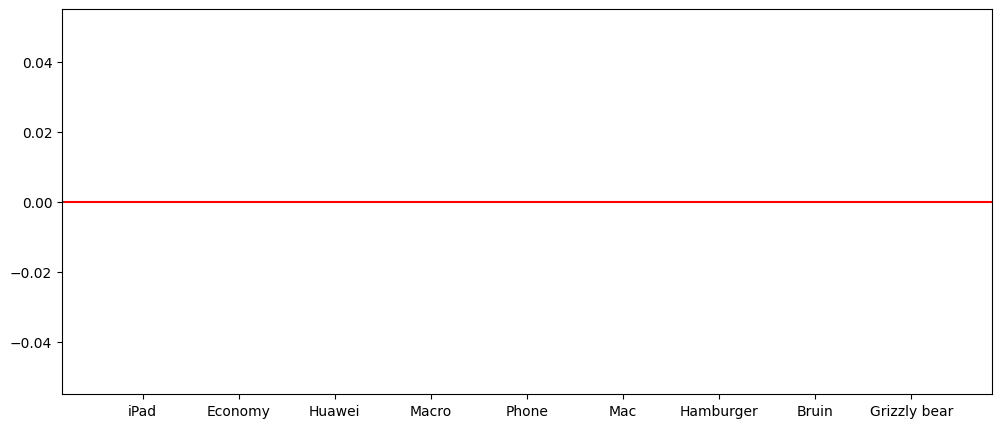

In [163]:
plt.figure(figsize = (12,5))
plt.bar(range(len(coefficients)), coefficients,tick_label = feature_names)
plt.axhline(0, color = "red")
plt.show()

# 5.) Do these coefficient magnitudes make sense?

All my coefficients are 0, which doesn't make sense. The error may due to the data scaling issues.

In [164]:
# ------

# 6.) Run a for loop looking at 10 different Lambdas and plot the coefficient magnitude for each.

# 7.) Run a cross validation. What is your ideal lambda?